In [123]:
# !pip install -r requirements.txt

# Unidad 1

## 1.1 - DL Overview

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

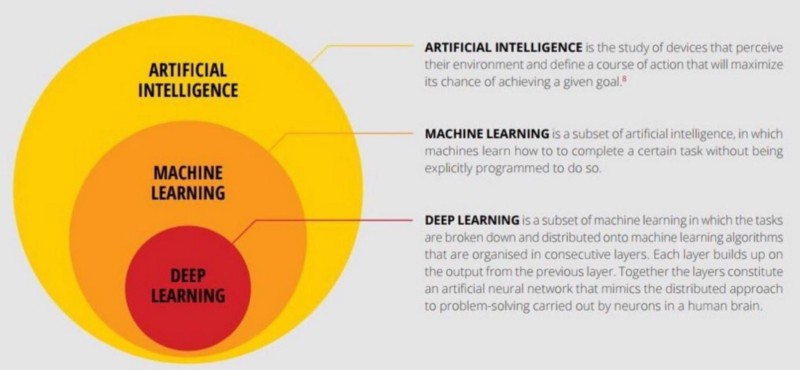

In [16]:
from IPython.display import Image
Image(filename='content/local/imgs/ai_ml_dl.jpeg')

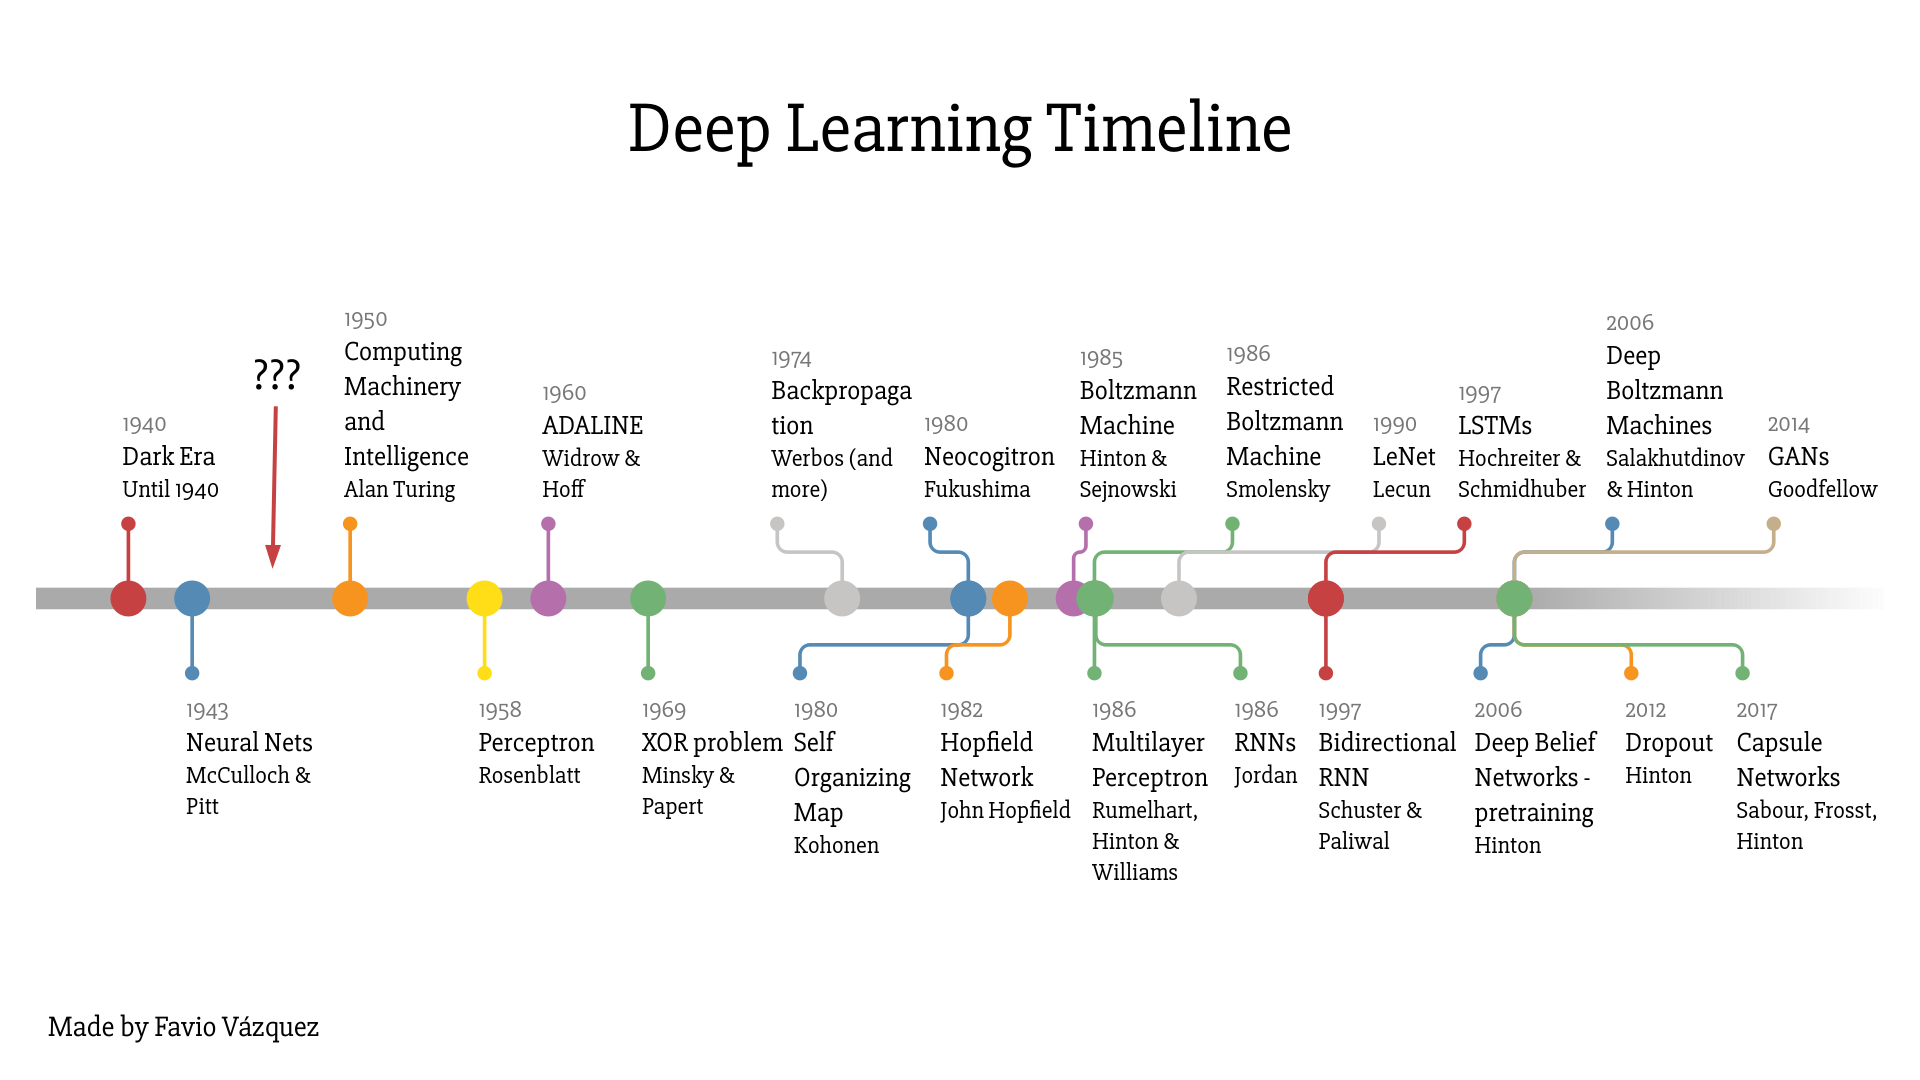

In [17]:
Image(filename='content/local/imgs/DL_timeline.png')

### Some types of Neural Networks

http://www.asimovinstitute.org/neural-network-zoo/

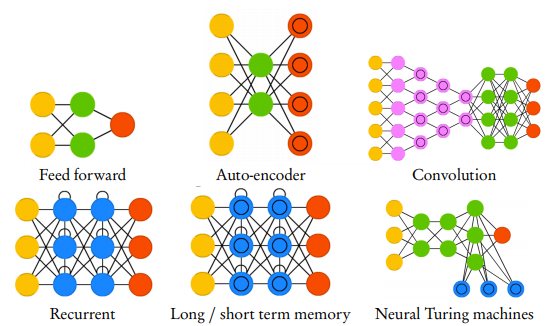

In [18]:
Image(filename='content/local/imgs/nntypes.png')

### Why DL now?

[A “weird” introduction to Deep Learning](https://towardsdatascience.com/a-weird-introduction-to-deep-learning-7828803693b0)
    
        As I said before, until the late 2000s, we were still missing a reliable way to train
        very deep neural networks. Nowadays, with the development of several simple but important
        theoretical and algorithmic improvements, the advances in hardware (mostly GPUs, now TPUs), 
        and the exponential generation and accumulation of data, DL came naturally to fit this 
        missing spot to transform the way we do machine learning.

### Feature learning

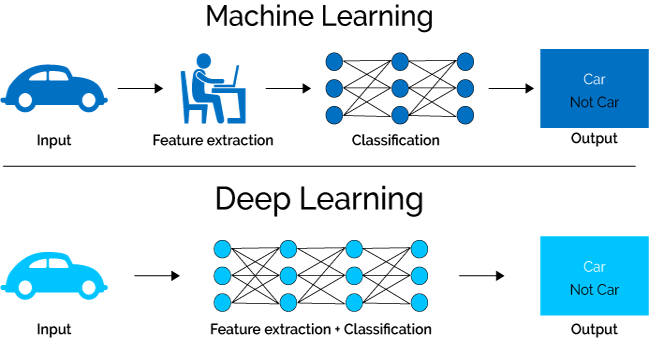

In [19]:
Image(filename='content/local/imgs/feature_learning_ml_dl.png')

### DL is suited for large datasets with highly dimensional input variables

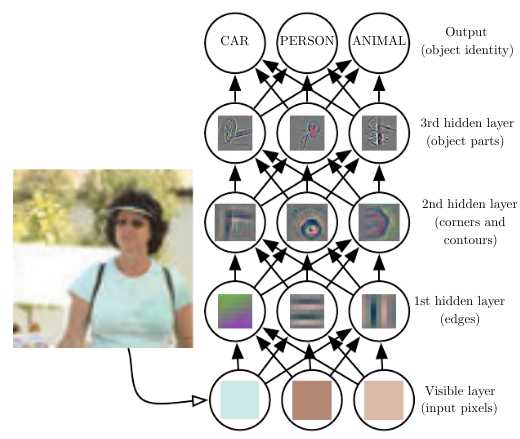

In [20]:
Image(filename='content/local/imgs/cnn_feature_hierarchy.png')

## 1.2 - Models derived from data

### ¿Qué es _Machine Learning (ML)_?

**Primero** realizamos experimentos (ciencia), **después** desarrollamos productos (ingeniería)

Dos roles $\rightarrow$ dos flujos de trabajo:

- **diseñador** de algoritmos de ML $\rightarrow$ se enfoca en cómo se **genera un modelo**.
- **usuario** de algoritmos de ML $\rightarrow$ se enfoca que **calibrar modelos** respecto a unos datos concretos.


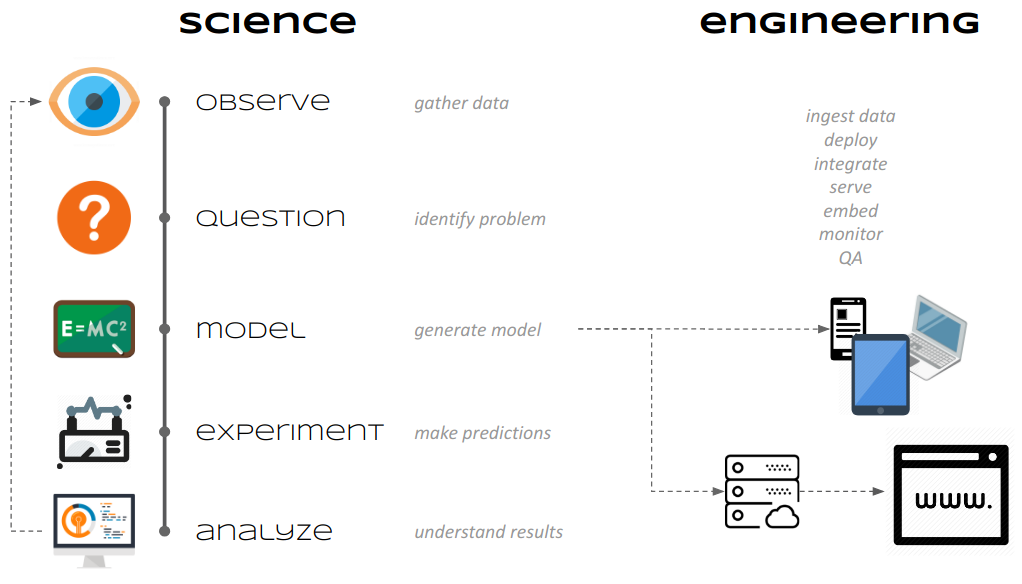

In [25]:
from IPython.display import Image
Image(filename='content/local/imgs/science_engineering.png', width=600)

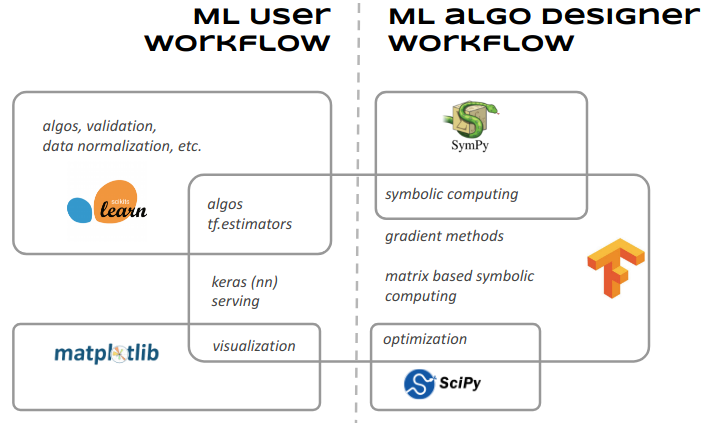

In [26]:
Image(filename='content/local/imgs/ml_workflows_tools.png', width=600)

### ¿Qué es un modelo derivado de los datos?

**Caso ideal**: Sabemos las distribuciones de las que vienen los datos. $\Rightarrow$ podemos calcular analíticamente nuestro modelo.

- ¿Podemos encontrar un modelo con 100% de acierto? ¿Por qué sí, o por qué no?


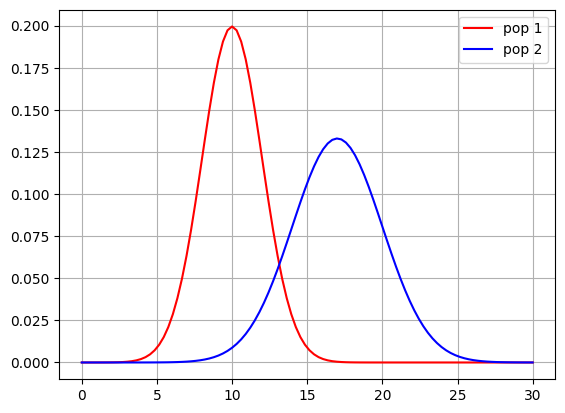

In [27]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)


x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.grid()
plt.legend();

frontera óptima en 13.15


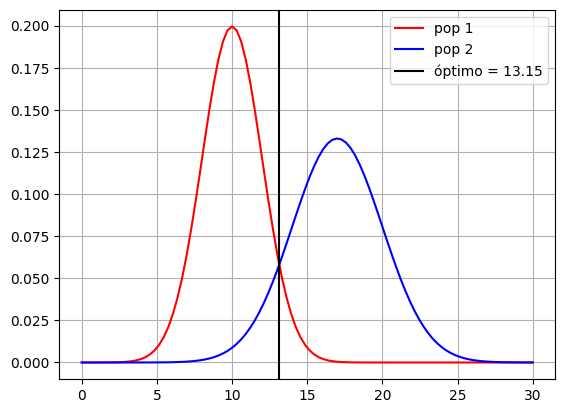

In [28]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print("frontera óptima en %.2f"%minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label="óptimo = %.2f"%minx)
plt.grid()
plt.legend();

#### cálculo analítico de los errores de clasificación

In [32]:
print("pop 1 error", 1-d1.cdf(minx))
print("pop 2 error", d2.cdf(minx))

pop 1 error 0.05773516274534907
pop 2 error 0.09957961739117976


**Caso real**: Tenemos una muestra de los datos 

$\rightarrow$ ¿Cómo determinamos donde poner la frontera?

$\rightarrow$ ¿Qué frontera qusiéramos obtener?

In [34]:
def show_1D_dataset_samples(n, n_datasets=10, dot_alpha=.5, line_alpha=.5, figsize=(20,5)):
    from sklearn.tree import DecisionTreeClassifier
    plt.figure(figsize=figsize)
    for i in range(n_datasets):

        m1 = d1.rvs(n)
        m2 = d2.rvs(n)
        X = np.append(m1, m2).reshape(-1,1)
        y = np.r_[[0]*len(m1)+[1]*len(m2)]
        estimator = DecisionTreeClassifier(max_depth=1)
        estimator.fit(X,y)
        Xr = np.linspace(5, 30, 100).reshape(-1,1)
        yr = estimator.predict(Xr)
        plt.plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        plt.plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        plt.scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        plt.scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100)
    plt.axis("off")

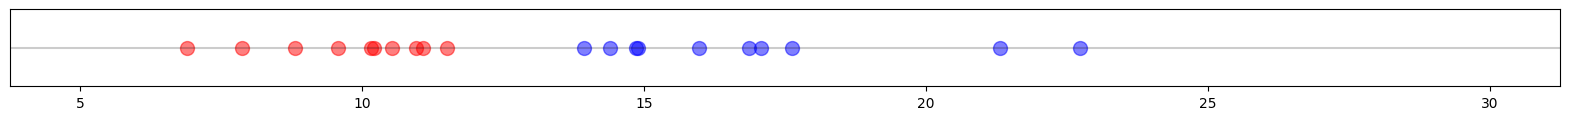

In [35]:
show_1D_dataset_samples(10, n_datasets=1, dot_alpha=.5, line_alpha=0, figsize=(20,1))
plt.axis("on")
plt.ylim(.095, .105)
plt.yticks([])
plt.axhline(.1, color="black", alpha=.2)

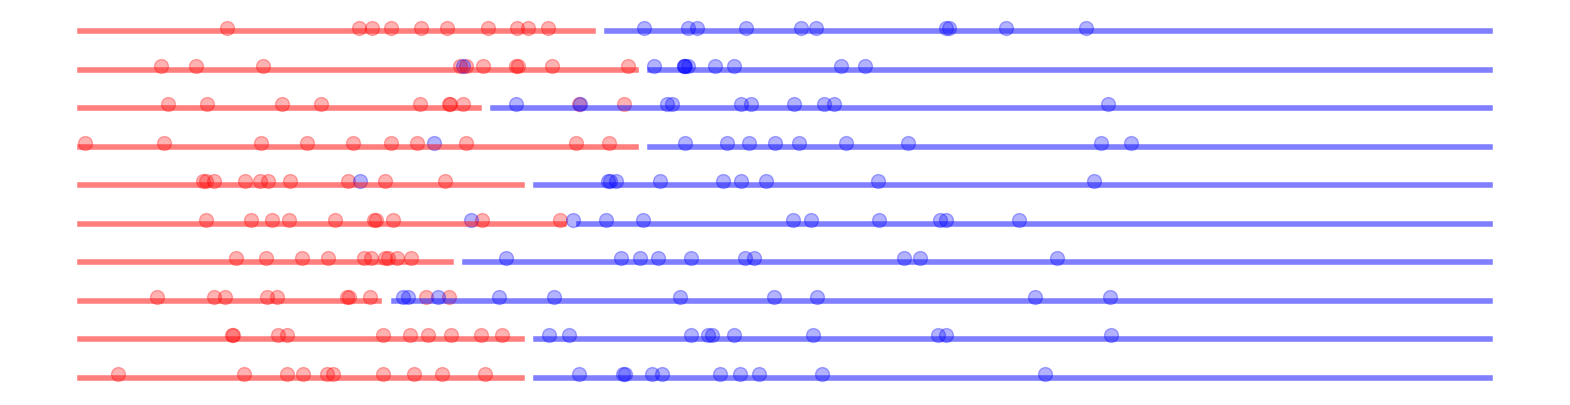

In [36]:
show_1D_dataset_samples(10, dot_alpha=.3)

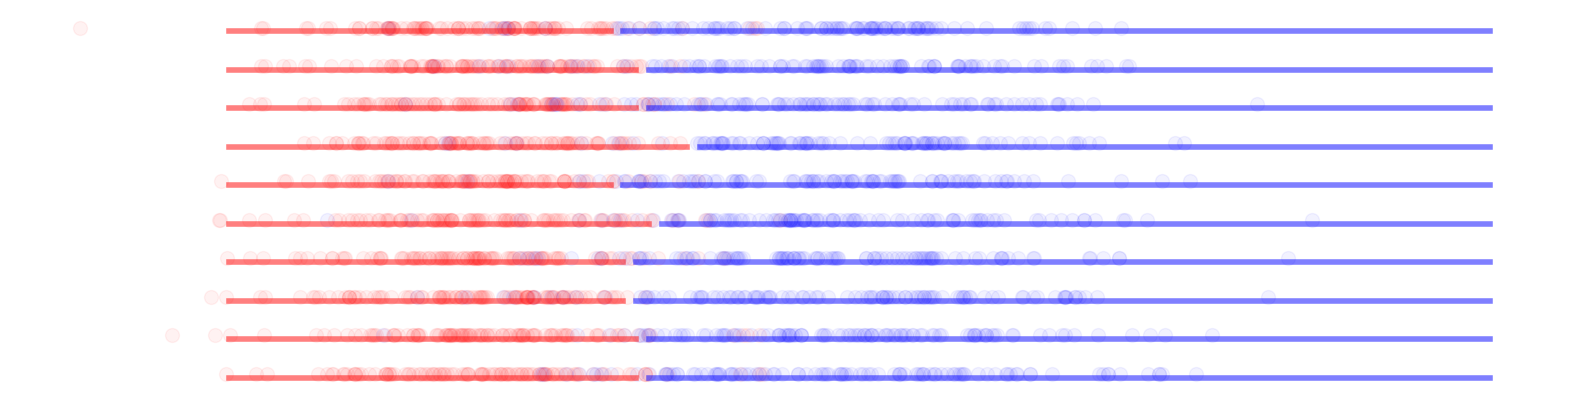

In [38]:
show_1D_dataset_samples(100, dot_alpha=.05)

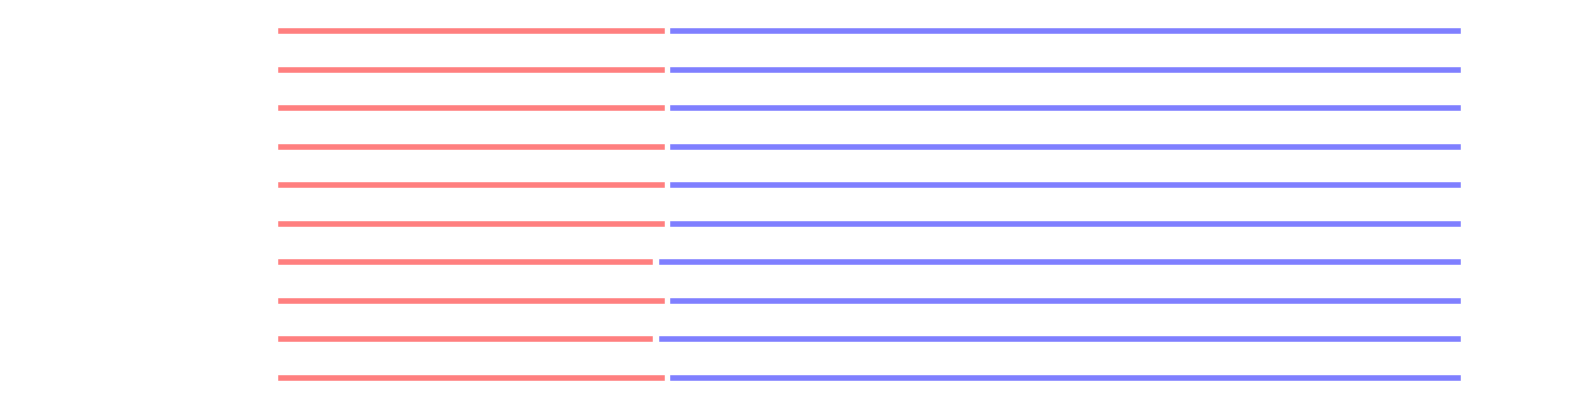

In [39]:
show_1D_dataset_samples(10000, dot_alpha=.001)

**Caso en 2D**

- en 2D, un modelo de clasificación **es una frontera** en el plano

- **supongamos** que tenemos acceso a las distribuciones de las que surgen los datos $\rightarrow$ podemos muestrear tantas veces como queramos

- ¿cuál es la frontera que produce menos error de clasificación?

- $\epsilon$ es el error de clasificación calculado analíticamente **con la frontera óptima** porque conocemos las distribuciones que generan los datos.
- $\hat{\epsilon}$ es el error de clasificacón calculado con la muestra de datos y **con la frontera óptima** (conocida también como _frontera bayesiana_).

In [44]:
from content.local.lib import mlutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline

c:\Users\Kuro\Documents\projects\NotasDeepLearning\env\lib\site-packages\scipy\stats\_multivariate.py:757: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


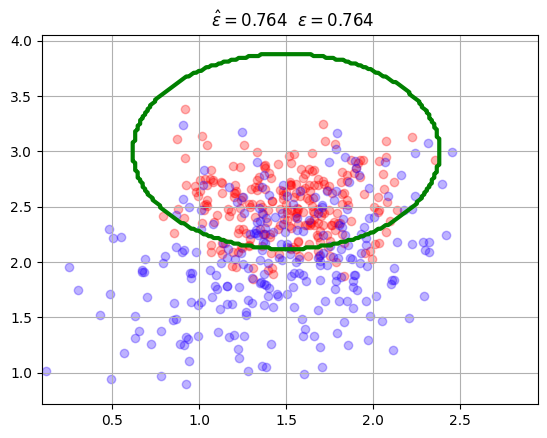

In [45]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.5], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0,.2]])
X,y = mc.sample(500)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();

haz los siguientes experimentos:

- separa los centros de las distribuciones de cada clase (`mean0`, `mean1`).
- aumenta y disminuye las matrices de covarianza.
- aumenta y disminuye el número de muestras.


- observa la estabilidad de $\hat{\epsilon}$ respecto a $\epsilon$ según ambas clases están más mezcladas o hay más o menos datos.

en general **SOLO TENEMOS UNA MUESTRA** de los datos, porque no tenemos conocimiento de las distribuciones que los generan. Los métodos de **estadística** y de **machine learning** están diseñados para esta situación.

Ejecuta la siguiente celda y pregúntate cada vez, **¿qué frontera establecerías con los datos que ves?**.

Fíjate que tenemos distintas muestras de una misma disitribución de base. Es decir, **la realidad detrás de estos datos siempre es la misma**.

**Aumenta** el número de muestras y hazte cada vez la misma pregunta.

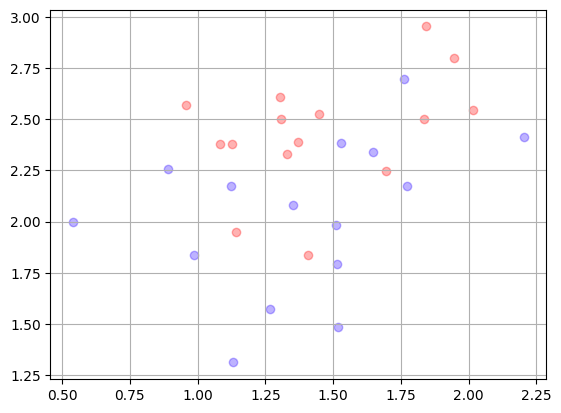

In [46]:
X,y = mc.sample(30)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
plt.grid()

#### Los algoritmos de machine learning:

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana.

O sea, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear una alguna suposición de base:

- los datos vienen de distribuciones normales.
- las columnas son estadísticamente independientes.
- la frontera es lineal, o cuadrática.
- la frontera se representa con una red neuronal.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- el objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede captuarar una frontera cuadrática).
- necesitamos dos tipos de herramientas:
   - una buena colección de algoritmos ML.
   - métodos para saber qué tan cerca estamos de la frontera bayesiana.

#### observa cómo un clasificador lineal aproxima la frontera con diferentes tamaños de muestras

- cambia el parámetro `n_samples` y experimenta con el siguiente código.
- usa luego estimadores distintos. P.ej.

        estimator = SVC(gamma=1)
        estimator = RandomForestClassifier()
        estimator = SVC(gamma=100)
        
Hazte las siguientes preguntas:

- ¿qué complejidad es capaz de capturar un estimador?

c:\Users\Kuro\Documents\projects\NotasDeepLearning\env\lib\site-packages\scipy\stats\_multivariate.py:757: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
c:\Users\Kuro\Documents\projects\NotasDeepLearning\env\lib\site-packages\scipy\stats\_multivariate.py:757: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


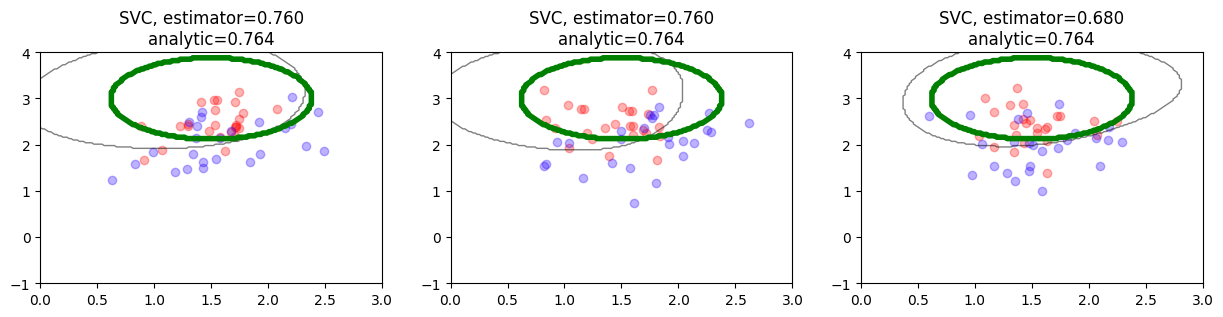

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import importlib
importlib.reload(mlutils)
n_samples = 50
estimator = LogisticRegression()
estimator = SVC(gamma=.5)
plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    mlutils.plot_estimator_border(mc, estimator, mins=[0,-1], maxs=[3,4], n_samples=n_samples, legend=False)

hacemos ahora el experimento más exhaustivo repitiendo 20 veces el siguiente proceso:

- se muestrea el dataset (recuerda que **excepcionalmente** tenemos acceso a las distribuciones que generan los datos y por tanto podemos hacer esto).
- se calcula la fronter de clasificación obtenida por el estimador usando el dataset muestreado.
- se pinta esta frontera (en negro).
- en verde se muestra la **frontera bayesiana**.

  0% (0 of 4) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 25% (1 of 4) |######                    | Elapsed Time: 0:00:00 ETA:   0:00:02
 50% (2 of 4) |#############             | Elapsed Time: 0:00:03 ETA:   0:00:04
 75% (3 of 4) |###################       | Elapsed Time: 0:00:06 ETA:   0:00:03
100% (4 of 4) |##########################| Elapsed Time: 0:00:21 Time:  0:00:21


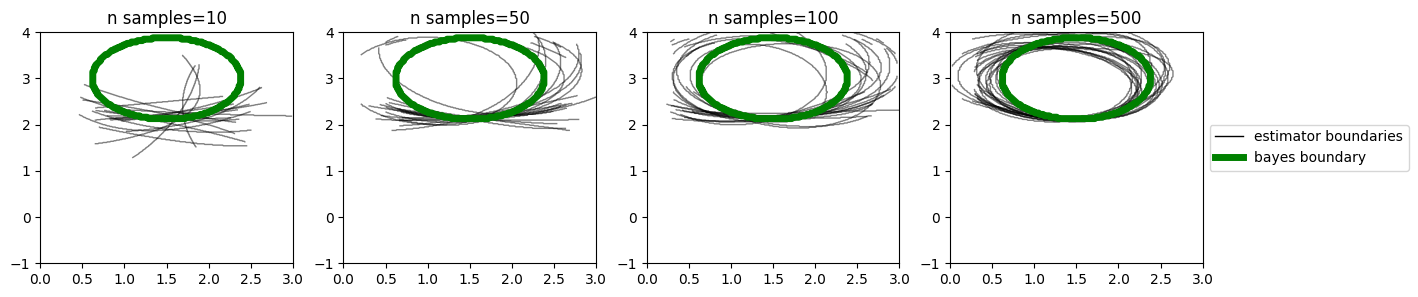

In [48]:
import importlib
import warnings
warnings.filterwarnings("ignore")
importlib.reload(mlutils)
mlutils.sample_borders(mc, estimator, samples = [10,50,100,500], n_reps=20, mins=[0,-1], maxs=[3,4])

### Solo tenemos un dataset

- remuestrea, reentrena para medir el desempeño y entender la estabilidad
- prueba con `test_pct` entre 0.1 y 0.9. observa la divergencia entre train y test cuando `test_pct` es más cercano a 0.9. ¿por qué?
- prueba con `SVC(gamma=100)`. En este caso observa la divergencia entre train y test incluso cuando `test_pct` es pequeño. ¿por qué?
- prubea además con `dataset_size` entre 20 y 500

Entiende la diferencia entre **tener pocos datos** y **overfitting**

Configuraciones interesantes sobre 

    mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[0.5, 0.1], [0.3, 0.5]],
                                            mean1=[1.2, 2.], cov1=[[0.2,0.1],[0,.5]])

- SVC $\gamma=100$, `dataset_size=500` (overfitting con pocos datos, convergencia con muchos)
- SVC $\gamma=100$, `dataset_size=2000` (overfitting con pocos datos, convergencia con muchos)
- SVC $\gamma=.01$, `dataset_size=100` (variabilidad siempre, convergencia promedio con pocos datos)
- SVC $\gamma=1$, `dataset_size=100` (variabilidad siempre, convergencia promedio con pocos datos)
- LinearRegression, `dataset_size=100` (nunca converge a la frontera bayesiana)



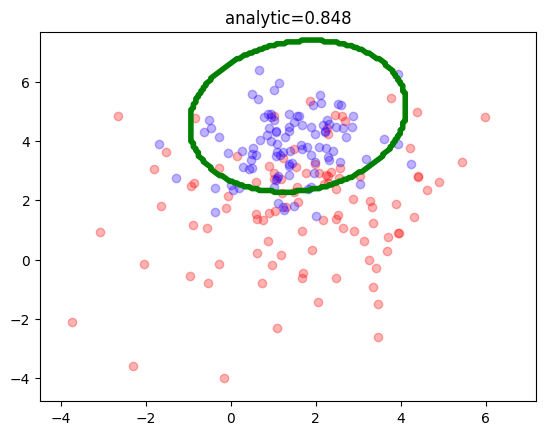

In [49]:
from content.local.lib import mlutils
dataset_size = 200
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[4., 0.5], [0.1, 4.]],
                                        mean1=[1.5,4.], cov1=[[1,0.5],[0.1,1.]])
X,y = mc.sample(dataset_size)
mlutils.plot_estimator_border(mc, n_samples=dataset_size, legend=False)
analitic_score = mc.analytic_score()

realizamos un muestreo para dividir entre train y test

In [50]:
test_pct = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140, 2) (140,)
(60, 2) (60,)


Text(0.5, 1.0, 'test data')

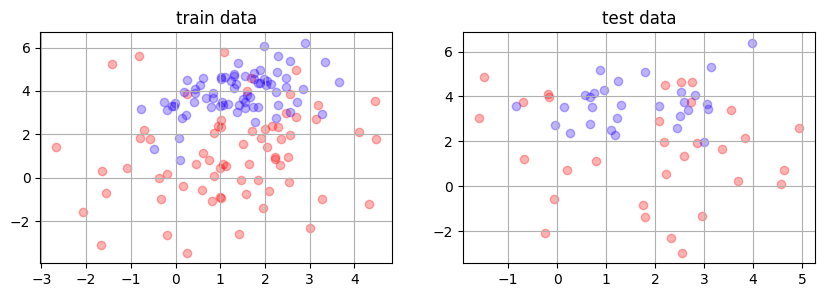

In [51]:
plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
plt.title("train data")
plt.grid()
plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
plt.grid()
plt.title("test data")

In [52]:
#estimator = SVC(gamma=1)
estimator = SVC(gamma=100)
#estimator = LogisticRegression()
#estimator = RandomForestClassifier()
estimator.fit(X_train, y_train)

SVC(gamma=100)

In [53]:
print("accuracy train %.2f"%estimator.score(X_train,y_train))
tr_preds = estimator.predict(X_train)
print("predicciones para train")
print(tr_preds)
print("ground truth para train")
print(y_train)

print("\naccuracy test %.2f"%estimator.score(X_test,y_test))
ts_preds = estimator.predict(X_test)
print("predicciones para test")
print(ts_preds)
print("ground truth para test")
print(y_test)

accuracy train 1.00
predicciones para train
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
ground truth para train
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.]

accuracy test 0.65
predicciones para test
[0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0

In [54]:
np.min(X, axis=0)

array([-2.67007646, -3.4570876 ])

train_score  1.00
test_score   0.68


(0.813975, 0.186025)

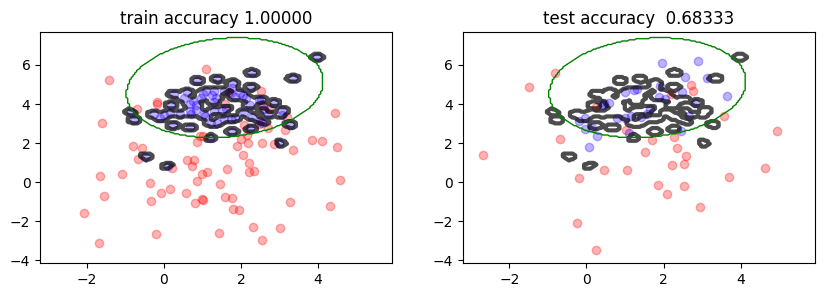

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
estimator.fit(X_train, y_train)
trsc = estimator.score(X_train, y_train)
tssc = estimator.score(X_test, y_test)
print("train_score %5.2f"%estimator.score(X_train, y_train))
print("test_score  %5.2f"%estimator.score(X_test, y_test))

plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.title("train accuracy %.5f"%estimator.score(X_train, y_train))

mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=1, line_alpha=1., line_color="green", label="bayes boundary")

plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.title("test accuracy  %.5f"%estimator.score(X_test, y_test))
mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=1, line_alpha=1., line_color="green", label="bayes boundary")

### Multidimensionalidad (>2D)

normalmente tenemos datasets de muchas dimensiones (columnas) y no podemos visualizar los datos como en 2D $\rightarrow$ necesitamos métodos para recabar evidencia sobre si tenemos pocos datos, estamos haciendo overfitting, etc.

Las **curvas de aprendizaje** nos ayudan a esto.

Realiza el experimento desde la sección anterior, con distintos tamaños del dataset inicial y con distintos algoritmos.

  0% (0 of 9) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 11% (1 of 9) |##                        | Elapsed Time: 0:00:00 ETA:  00:00:00
 22% (2 of 9) |#####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 33% (3 of 9) |########                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 44% (4 of 9) |###########               | Elapsed Time: 0:00:00 ETA:   0:00:00
 55% (5 of 9) |##############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 77% (7 of 9) |####################      | Elapsed Time: 0:00:00 ETA:   0:00:00
 88% (8 of 9) |#######################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


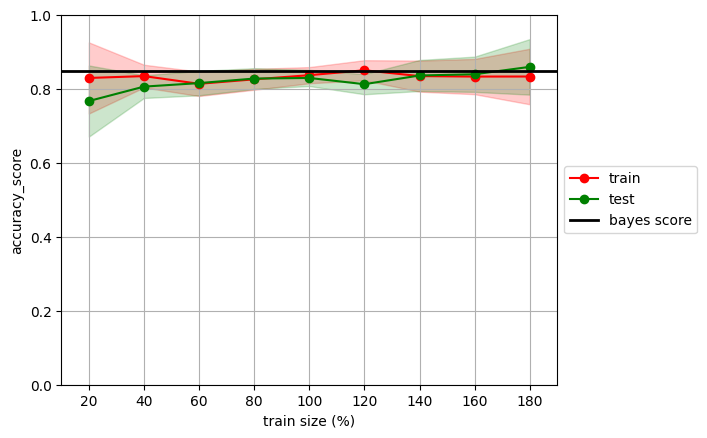

In [56]:
estimator = LogisticRegression()
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  0% (0 of 9) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 22% (2 of 9) |#####                     | Elapsed Time: 0:00:00 ETA:  00:00:00
 33% (3 of 9) |########                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 44% (4 of 9) |###########               | Elapsed Time: 0:00:00 ETA:   0:00:00
 55% (5 of 9) |##############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 66% (6 of 9) |#################         | Elapsed Time: 0:00:00 ETA:   0:00:00
 77% (7 of 9) |####################      | Elapsed Time: 0:00:00 ETA:   0:00:00
 88% (8 of 9) |#######################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


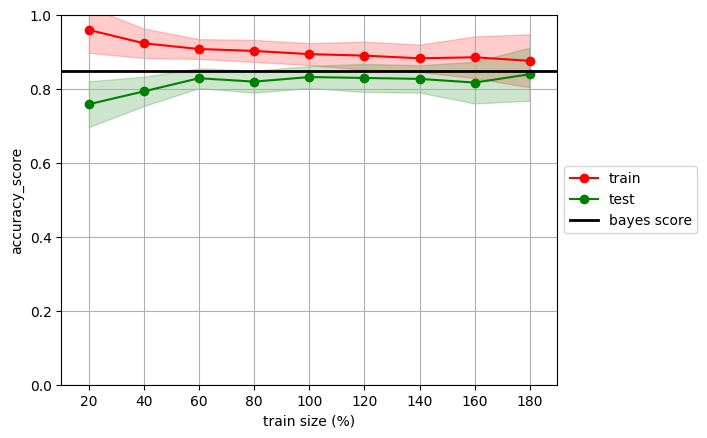

In [57]:
estimator = SVC(gamma=1)
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  0% (0 of 9) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 22% (2 of 9) |#####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 33% (3 of 9) |########                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 44% (4 of 9) |###########               | Elapsed Time: 0:00:00 ETA:   0:00:00
 55% (5 of 9) |##############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 66% (6 of 9) |#################         | Elapsed Time: 0:00:00 ETA:   0:00:00
 77% (7 of 9) |####################      | Elapsed Time: 0:00:00 ETA:   0:00:00
 88% (8 of 9) |#######################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


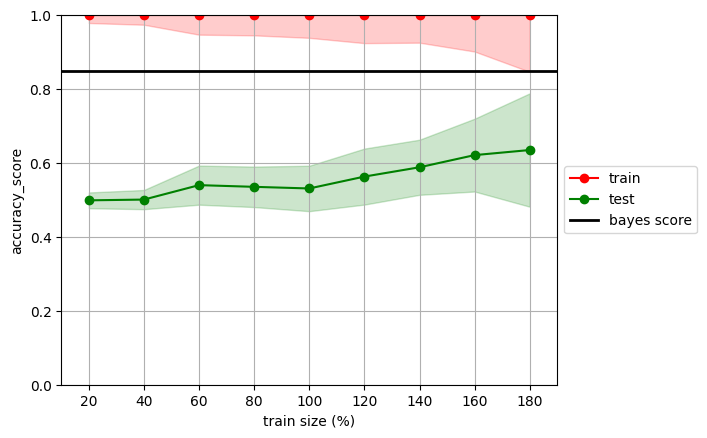

In [58]:
estimator = SVC(gamma=100)
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

no olvides que normalmente **no conocemos la _frontera bayesiana_**, y por tanto no tenemos el _bayes score_

### Taxonomía de problemas de machine learning

- Supervisados
   - Clasificación
   - Regresión
- No supervisados
   - Agrupamiento
   - Estimación de densidad
   - etc.
- Reinforcement learning


### Complejidad de los modelos vs. complejidad de los datos

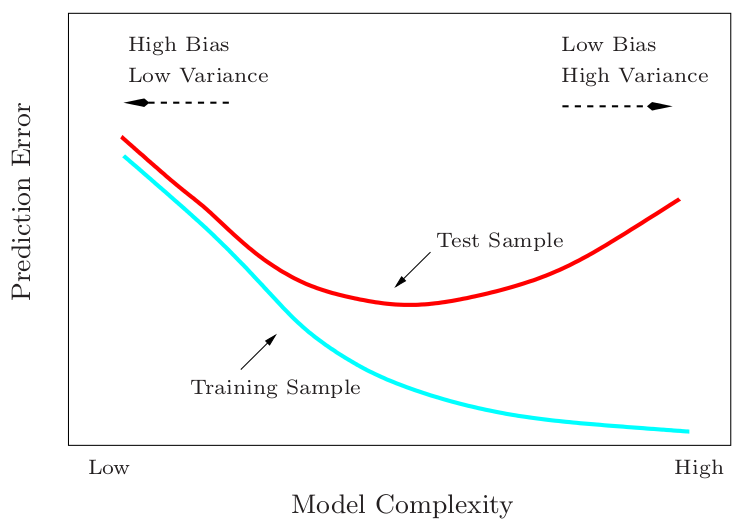

In [59]:
Image(filename='content/local/imgs/bvc.png', width=600)

## 1.3 - ML algorithm design

### Tipos de tareas de machine learning

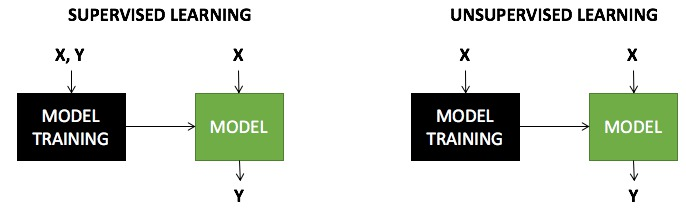

In [60]:
from IPython.display import Image
Image(filename='content/local/imgs/learning.jpg', width=800)

### Cómo se diseña un algoritmo ML

1. Elegir de qué parámetros depende una predicción $\rightarrow$ se define **cómo** es un modelo.
2. Definir una función que mida el error de la predicción.
3. Determinar qué valores de los parámetros minimizan el error de predicción.


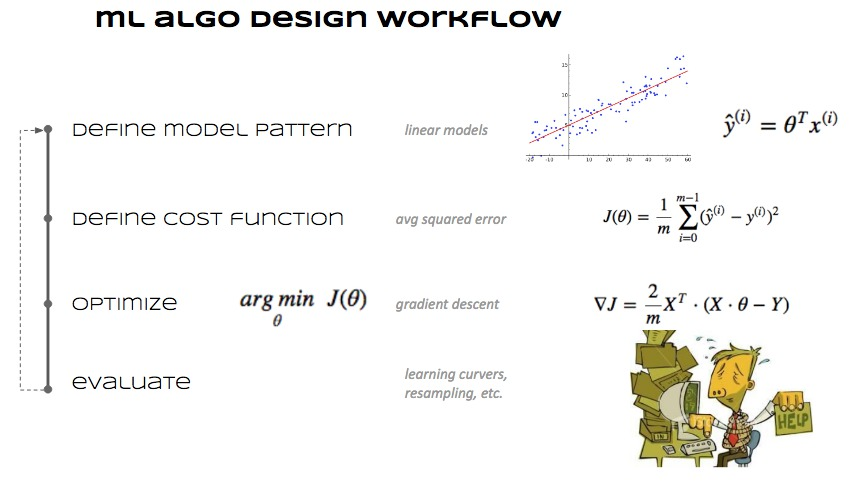

In [61]:
Image(filename='content/local/imgs/mldesign.jpg', width=800)

### Ejemplo

Los Trilotrópicos son insectos imaginarios que viven en las latitudes tropicales. Conocer su densidad de escamas es muy importante para poder saber qué insecticida aplicar. Pero **es muy costoso** contar las escamas.

Creemos que existe una relación entre la **longitud** y la **densidad de escamas** y queremos un modelo que prediga la densidad **a partir de la longitud**.

Esto es una tarea de regresión, ya que la predicción $\in \mathbb{R}$

Tenemos **datos anotados** (alguien contó las escamas de unos cuantos trilotrópicos) $\rightarrow$ estamos ante una tarea de **aprendizaje supervisado**

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

(150, 2)


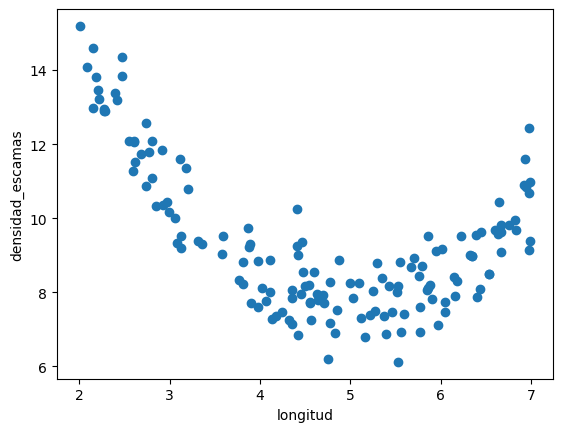

In [63]:
d = pd.read_csv("content/local/data/trilotropicos.csv")
print(d.shape)
plt.scatter(d.longitud, d.densidad_escamas)
plt.xlabel(d.columns[0])
plt.ylabel(d.columns[1]);

#### 1. Elegimos la forma del modelo

**Entrada**
- $x^{(i)}$: longitud del trilotrópico $i$

**Salida esperada**
- $y^{(i)}$: densidad de escamas del trilotrópico $i$

**Predicción ** $\rightarrow$ decidimos que nuestro modelo tiene la siguiente forma

- $\hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)}$

La siguiente es una posible combinación de $\theta_0$ y $\theta_1$ seleccionada aleatoriamente. Ejecútalo varias veces para entender el error.

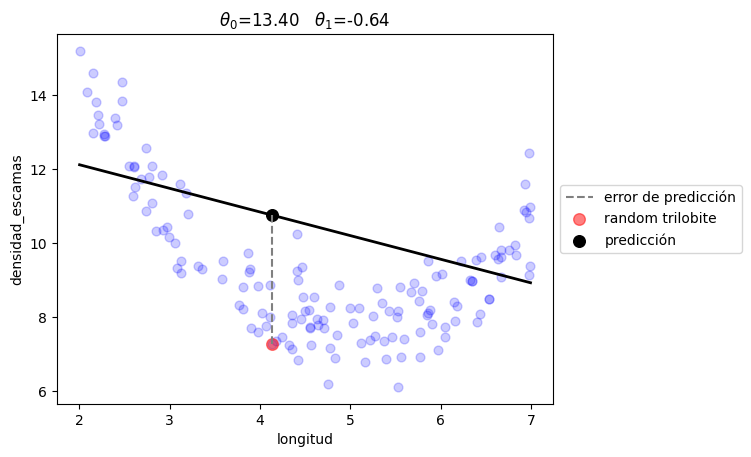

In [107]:
def linear_prediction(t, x):
    t0,t1 = t
    return t0 + t1*x

def plot_model(t, prediction):
    xr = np.linspace(np.min(d.longitud), np.max(d.longitud), 100)
    plt.scatter(d.longitud, d.densidad_escamas, s=40, alpha=.2, color="blue", label="")
    plt.plot(xr,prediction(t,xr), lw=2, color="black")
    plt.title("   ".join([r"$\theta_%d$=%.2f"%(i, t[i]) for i in range(len(t))]));

    p = d.iloc[np.random.randint(len(d))]
    pred = prediction(t, p.longitud)
    plt.plot([p.longitud, p.longitud], [p.densidad_escamas, pred], ls="--", color="gray", label=u"error de predicción")
    # plt.plot(np.squeeze([p.longitud, p.longitud]), np.squeeze([p.densidad_escamas, pred]), ls="--", color="gray", label=u"error de predicción")
    # plt.plot([p.longitud, p.longitud][0], [p.densidad_escamas, pred][0], ls="--", color="gray", label=u"error de predicción")


    plt.scatter(p.longitud, p.densidad_escamas, s=70, alpha=.5, color="red", label="random trilobite")
    plt.scatter(p.longitud, pred, s=70, alpha=1., color="black", label=u"predicción")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlabel(d.columns[0])
    plt.ylabel(d.columns[1]);
    
t0 = np.random.random()*5+10
t1 = np.random.random()*4-3

plot_model([t0,t1], linear_prediction)

#### 2. Definimos una medida de error

Para un dato cualquiera $(i)$
$$
\begin{align}
err^{(i)} &= (\hat{y}^{(i)}-y^{(i)})^2 \\
&=(\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2
\end{align}$$

Para todo el dataset

$$J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=0}^{m-1}(\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$$

si asumimos que

- $\overline{\theta} = [\theta_0, \theta_1]$
- $\mathbf{x}^{(i)} = [1, x^{(i)}]$

entonces podemos escribir de manera más compacta la expresión anterior:

$$J(\overline{\theta}) = \frac{1}{m} \sum_{i=0}^{m-1}(\overline{\theta} \dot \;  \mathbf{x}^{(i)} - y^{(i)})^2$$


In [96]:
def J(t, x, y, prediction):
    return np.mean( (prediction(t,x)-y)**2)
    

In [109]:
J([t0,t1], d.longitud, d.densidad_escamas, linear_prediction)

3.9192341344042423

#### 3. Obtenemos los parámetros que minimizan el error de predicción

observa cómo usamos un **algoritmo genérico de optimización**

In [108]:
r1 = minimize(lambda t: J(t, d.longitud, d.densidad_escamas, linear_prediction), np.random.random(size=2))
r1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.744766257080915
        x: [ 1.269e+01 -7.181e-01]
      nit: 9
      jac: [-1.520e-06 -8.196e-06]
 hess_inv: [[ 5.574e+00 -1.090e+00]
            [-1.090e+00  2.339e-01]]
     nfev: 30
     njev: 10

error total 2.74


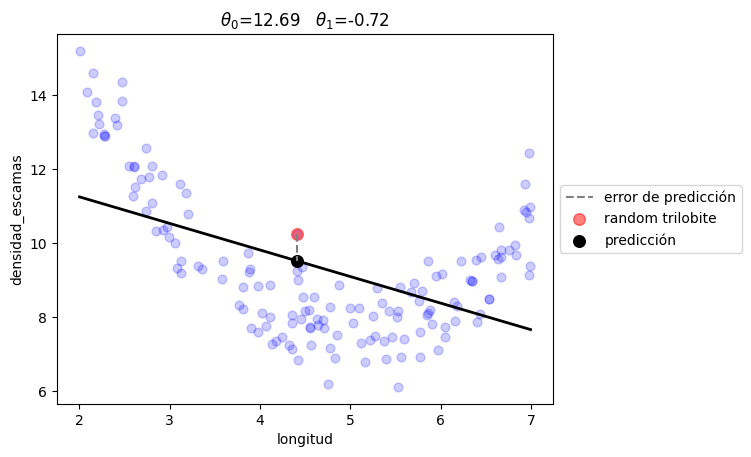

In [111]:
plot_model(r1.x, linear_prediction)
print("error total %.2f"%(J(r1.x, d.longitud, d.densidad_escamas, linear_prediction)))

fíjate que son los mismos valores que la regresión lineal clásica 

12.689998055222226 [-0.71805908]
error total 2.74


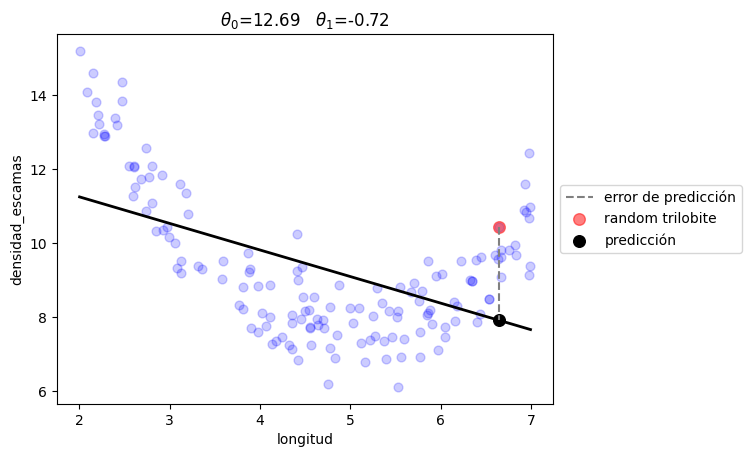

In [114]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(d.longitud.values.reshape(-1,1), d.densidad_escamas)
t0, t1 = lr.intercept_, lr.coef_
print(t0, t1)
plot_model([t0,t1[0]], linear_prediction)
print("error total %.2f"%(J([t0, t1], d.longitud, d.densidad_escamas, linear_prediction)))

#### Otra forma de modelo

esta vez con tres parámetros y un término **cuadrático**

$$\hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)} + \theta_2 (x^{(i)})^2$$


In [75]:
def quad_prediction(t, x):
    t0,t1,t2 = t
    return t0 + t1*x + t2*x**2

r2 = minimize(lambda t: J(t, d.longitud, d.densidad_escamas, quad_prediction), np.random.random(size=3))
r2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.5533076730537259
        x: [ 2.676e+01 -7.611e+00  7.570e-01]
      nit: 14
      jac: [-6.706e-08 -8.941e-08  0.000e+00]
 hess_inv: [[ 5.006e+01 -2.294e+01  2.404e+00]
            [-2.294e+01  1.096e+01 -1.180e+00]
            [ 2.404e+00 -1.180e+00  1.298e-01]]
     nfev: 64
     njev: 16

error total 0.55


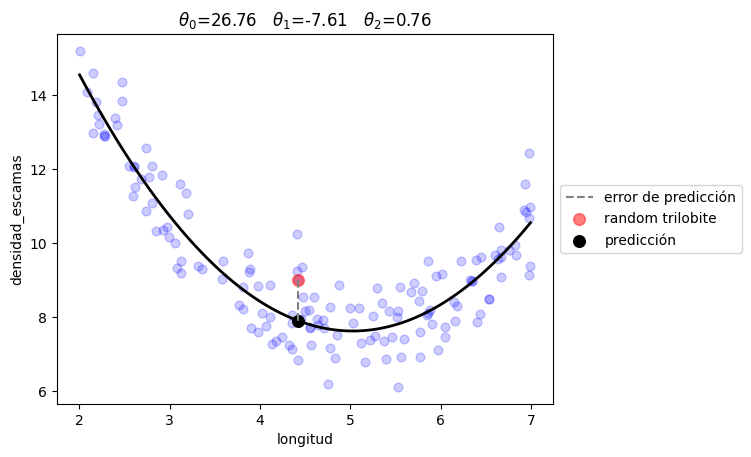

In [113]:
plot_model(r2.x, quad_prediction)
print("error total %.2f"%(J(r2.x, d.longitud, d.densidad_escamas, quad_prediction)))

observa como indirectamente hacemos lo mismo con la regresión lineal de `sklearn` añadiendo explícitamente una columna con la longitud al cuadrado

In [ ]:
lr = LinearRegression()
lr.fit(np.r_[[d.longitud.values, d.longitud.values**2]].T, d.densidad_escamas)
t0, (t1, t2) = lr.intercept_, lr.coef_
t0, t1, t2

(26.75883713364987, -7.610553466924376, 0.7570201016172378)

### Tipología de algoritmos

- Generativos
- Discriminativos


### Abriendo la caja negra de la optimización

**EN ML, NO ES POSIBLE USAR ALGORITMOS DE OPTIMIZACIÓN TAN GENÉRICOS**, debido a:

- la complejidad de los modelos.
- la participación de los datos en las expresiones.

p.ej. ¿cuántos términos tiene la siguiente expresión?

$$J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=0}^{m-1}(\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$$

#### 1. El gradiente

para que la optimización funcione en ML **es necesario** calcular el gradiente de la función de pérdida (el conjunto de derivadas parciales). Observa [aquí](https://matthewebmckenna.com/posts/2017/05/gradient-descent-linear-regression) la derivación matemática del gradiente para el caso de regresión lineal (que en realidad es el más sencillo).

Usamos la notación vectorial: $\theta = [\theta_0, \theta_1]$, $X = [ [1, x^{(i)}] ]^m \in \mathbb{R}^{m\times 2}$ y la función de pérdida queda como:

$$J(\theta) = \text{mean}(\mathbf{X}\theta-\mathbf{y})^2$$

y el gradiente

$$\nabla J = \begin{bmatrix}
\frac{\partial J}{\partial \theta_0}\\
\frac{\partial J}{\partial \theta_1}
\end{bmatrix} = \frac{1}{m}2X^{T}\cdot(X\cdot\theta-Y)$$

Observa ahora que cuando usamos el gradiente la minimización es mucho más eficiente (número de evaluaciones `nfev`) .

**EN ML, SIN EL GRADIENTE LA OPTIMIZACIÓN NO ES POSIBLE**

In [77]:
g = []

init_t = np.random.random()*40-5, np.random.random()*20-10

y = d.densidad_escamas.values
X = np.r_[[[1]*len(d), d.longitud.values]].T

def n_cost(t):
    return np.mean((X.dot(t)-y)**2)

def n_grad(t):
    return 2*X.T.dot(X.dot(t)-y)/len(X)

print("sin usar el gradiente")
r = minimize(n_cost, init_t, method="BFGS")
print(r)

print("\n usando el gradiente")
r = minimize(n_cost, init_t, method="BFGS", jac=n_grad)
print(r)

sin usar el gradiente
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.7447662570801254
        x: [ 1.269e+01 -7.181e-01]
      nit: 4
      jac: [-1.192e-07  2.980e-08]
 hess_inv: [[ 5.575e+00 -1.091e+00]
            [-1.091e+00  2.347e-01]]
     nfev: 18
     njev: 6

 usando el gradiente
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.744766257080116
        x: [ 1.269e+01 -7.181e-01]
      nit: 4
      jac: [ 1.397e-15  5.329e-15]
 hess_inv: [[ 5.575e+00 -1.091e+00]
            [-1.091e+00  2.347e-01]]
     nfev: 6
     njev: 6


observa el mapa del coste respecto a todos los posibles valores de $\theta_0$ y $\theta_1$ en el caso de un modelo lineal.

en blanco **los valores óptimos**

#### 2. la optimización como proceso iterativo

fíjate cómo la optimización busca un camino en el espacio de parámetros para llegar al mínimo.

In [78]:
import itertools
def plot_cost(cost, t0_range, t1_range, vx=None,vy=None):
    k0,k1 = 40,40

    t0 = np.linspace(t0_range[0], t0_range[1], k0)
    t1 = np.linspace(t1_range[0], t1_range[1], k1)

    p = np.zeros((k0,k1))

    for i,j in itertools.product(range(k0), range(k1)):
        p[i,j] = np.log(cost(np.r_[t0[i],t1[j]]))

    plt.contourf(t0, t1, p.T, cmap=plt.cm.hot, levels=np.linspace(np.min(p), np.max(p), 20))
    plt.ylabel(r"$\theta_1$")
    plt.xlabel(r"$\theta_0$")
    plt.title("loss")
    plt.colorbar()

    if vx is not None:
        plt.axvline(vx, color="white")
    if vy is not None:
        plt.axhline(vy, color="white")
    

In [79]:
g = []
loss_history = []
def log(xk):
    loss_history.append(loss(xk))
    g.append(xk)

init_t = np.random.random()*40-5, np.random.random()*20-10

loss = lambda t: J(t, d.longitud, d.densidad_escamas, linear_prediction)


r = minimize(loss, init_t, callback=log, method="BFGS")
r

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.7447662570801286
        x: [ 1.269e+01 -7.181e-01]
      nit: 7
      jac: [ 5.960e-08  2.980e-08]
 hess_inv: [[ 5.575e+00 -1.092e+00]
            [-1.092e+00  2.349e-01]]
     nfev: 24
     njev: 8

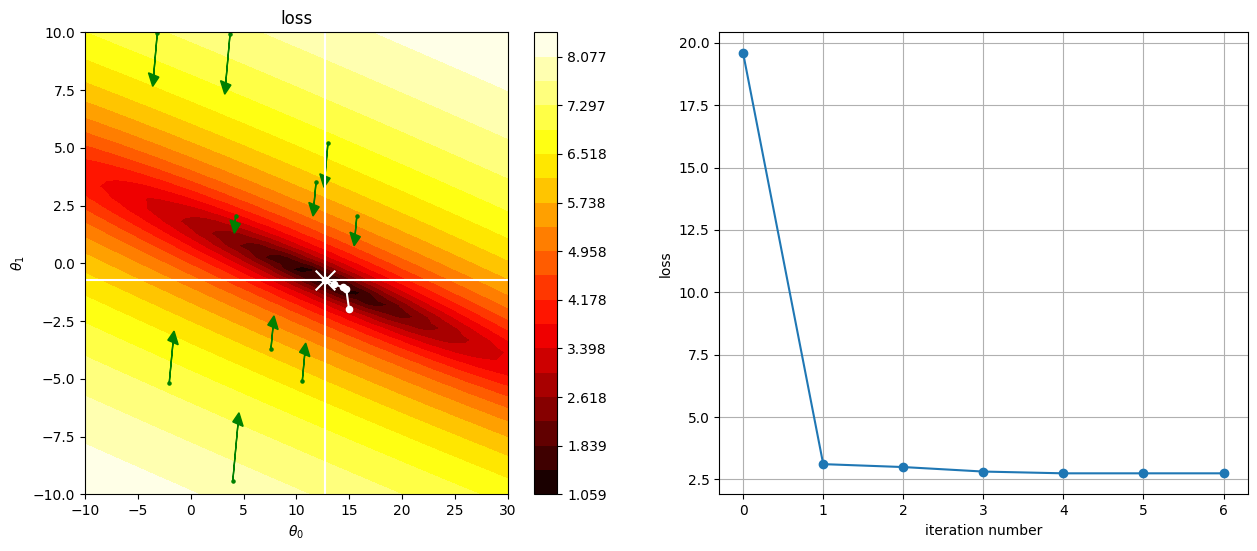

In [80]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plot_cost(loss, (-10,30), (-10,10), vx=r1.x[0], vy=r1.x[1])
g = np.r_[g]
plt.plot(g[:,0], g[:,1], color="white")
plt.scatter(g[:,0], g[:,1], color="white", s=20)
plt.scatter(g[-1,0], g[-1,1], marker="x", color="white", s=200)

# plot gradient at some points
for _ in range(10):
    t = np.random.random()*30-5, np.random.random()*20-10
    grad = n_grad(t)
    grad = grad/200
    plt.scatter(t[0],t[1], c="green", s=5)
    plt.arrow(t[0], t[1], -grad[0], -grad[1], head_width=1, head_length=0.5, fc='green', ec='green')

plt.subplot(122)
plt.plot(loss_history, marker="o")
plt.xlabel("iteration number")
plt.ylabel("loss")
plt.grid()

## LAB 01.01 - WARM UP

In [ ]:
# from local.lib.rlxmoocapi import submit, session
# import inspect
# session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L01.01", varname="student");

### Task 1: An operation with matrices

Given the following matrices and vectors:

- $X \in \mathbb{R}^{m\times n}$
- $y \in \mathbb{R}^m$
- $W \in \mathbb{R}^{n\times 1}$
- $b \in \mathbb{R}$

Complete the following function so that it computes the following value:

$$\text{mean}\bigg(\big(\text{relu}(X \times W + b) - y\big)^2\bigg)$$

observe that:

- $X\times W \in \mathbb{R}^m$ and $b \in \mathbb{R}$, so $b$ gets added (_broadcasted_) to all elements of $X \times W$
- $\text{mean}$ is the mean of the elements of an vector with $m$ elements.
- The result is a number $\in \mathbb{R}$
- $\text{relu}(z)=\text{max}(0,z)$ is a function $\mathbb{R}\rightarrow\mathbb{R}$ that when applied to a vector is also **broadcasted** (applied individually to each element of the vector)

**CHALLENGE**: Solve it with a single line of Python code (not counting the `relu` function definition).

In [115]:
import numpy as np

def operation(X,y,W,b):
    relu = lambda x: x*(x>0)
    return np.mean((relu(X.dot(W)+b)-y)**2)
    

test your code with the following case, which should result in `0.15848`

In [116]:
X = np.array([[-0.09348275, -0.17182042, -0.29143506],
              [ 0.34581753,  0.37816707,  0.39850916],
              [ 0.23478876, -0.07832256,  0.10793716],
              [-0.1746856 , -0.10240038, -0.27959607]])

y = np.array([[-0.47312685],
              [ 0.42086142],
              [ 0.44194868],
              [ 0.46536898]])
W = np.array([[0.12650597],
              [0.49952987],
              [0.34470552]])

b = -0.02

In [117]:
operation(X,y,W,b)

0.15848356715672943

test your code with random input values. This is actually what the **automatic grader** does

In [118]:
m,n = np.random.randint(5, size=2)+2
X = np.random.random(size=(m,n))-0.5
W = np.random.random(size=(n,1))-0.5
b = np.random.random()-0.5
y = np.random.random(size=n)-0.5
print ("X=\n", X)
print ("y=\n", y)
print ("W=\n", W)
print ("b=\n", b)
print ("an_operation=", operation(X,y,W,b))

X=
 [[-0.01498765 -0.19219645]
 [ 0.48465752  0.22029653]
 [-0.40242784 -0.05678781]]
y=
 [-0.35217572 -0.41315941]
W=
 [[ 0.15278075]
 [-0.2694665 ]]
b=
 0.3271703725605617
an_operation= 0.5149189730303577


**Submit your solution**

In [ ]:
# student.submit_task(namespace=globals(), task_id='T1');

### Task 2: Function `argmax`

Complete the following function such that when, given as argument a function `f(x)` with $x\in\mathbb{R}$, returns the value of $x$ which maximizes `f(x)`. If there is more than one value that maximizes the function, just return any one of those. 

Your return value must be exact up to 1 decimal position, and must be a number of type `float` (not a `numpy` array or any other type of object)

**HINT**: Use [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) with the `BFGS` method, with a `lambda` function.

**CHALLENGE**: Solve it with one single line of code (not counting the `import`)

In [119]:
def argmax(f):
    from scipy.optimize import minimize
    return minimize(lambda x: -f(x), 0, method="BFGS").x[0]
    

Test your code, the following two functions must have their max on `x=1` and `x=-2` approx.

In [120]:
def A(x):
    return -(x-1)**2

B = lambda x: -(x+2)**4

Text(0.5, 1.0, 'B(X)')

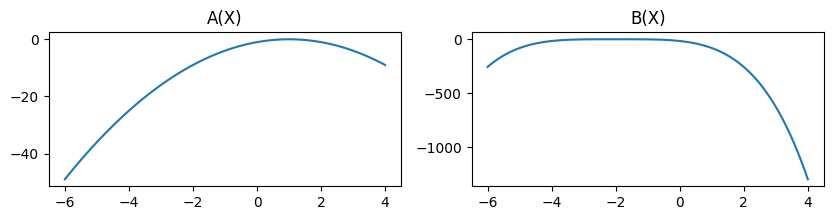

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-6,4, 100)
plt.figure(figsize=(10,2))
plt.subplot(121); plt.plot(x, A(x)); plt.title("A(X)")
plt.subplot(122); plt.plot(x, B(x)); plt.title("B(X)")

In [122]:
argmax(A), argmax(B)

(0.9999999925496535, -1.9879498534110263)

**Submit your solution**

In [ ]:
# student.submit_task(namespace=globals(), task_id='T2');